In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from skimage.io import imread, imshow

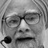

In [2]:
tf.keras.preprocessing.image.load_img("../Datasets\\fer2013\\train/Angry\\1.jpg")

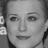

In [3]:
tf.keras.preprocessing.image.load_img("../Datasets\\fer2013\\train/Happy\\10.jpg")

## Train and Test Set

### Train

In [4]:
training_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

training_data = training_generator.flow_from_directory(
    "../Datasets\\fer2013\\train",
    target_size=(48, 48),
    batch_size=16,
    color_mode="grayscale",
    class_mode="categorical",
    shuffle=True
)


Found 28709 images belonging to 7 classes.


In [5]:
training_data.classes

array([0, 0, 0, ..., 6, 6, 6])

In [6]:
np.unique(training_data.classes, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]),
 array([3995,  436, 4097, 7215, 4965, 4830, 3171], dtype=int64))

In [7]:
training_data.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

<Axes: ylabel='count'>

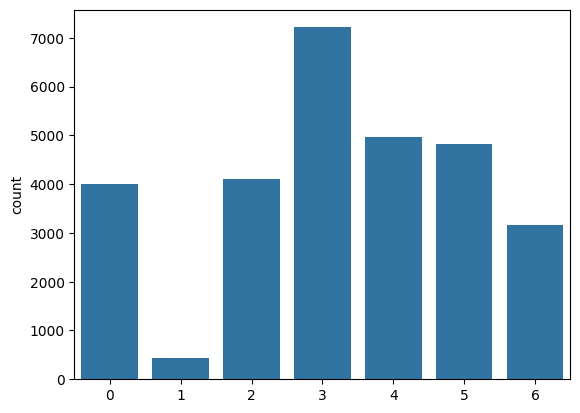

In [8]:
sns.countplot(x = training_data.classes)

### Test

In [9]:

test_generator = ImageDataGenerator(
    rescale=1./255
)


test_data = test_generator.flow_from_directory(
    "../Datasets\\fer2013\\validation",
    target_size=(48, 48),
    batch_size=1,
    color_mode="grayscale",
    class_mode="categorical",
    shuffle=False
)

Found 3589 images belonging to 7 classes.


## Building and Training Convo Neural Networks

In [10]:
num_detectors = 32 # Num of kernels
num_classes = 7
width, height = 48, 48
epochs = 50


network = Sequential()

network.add( Conv2D(num_detectors, (3, 3), input_shape=(width, height, 1), padding='same', activation="relu") )
network.add( BatchNormalization() ) 
network.add( Conv2D(num_detectors, (3, 3), padding='same', activation="relu") )
network.add( BatchNormalization() ) 
network.add( MaxPooling2D(pool_size=(2, 2)) ) 
network.add( Dropout(0.2) ) 

network.add( Conv2D(num_detectors * 2, (3, 3),  padding='same', activation="relu") )
network.add( BatchNormalization() ) 
network.add( Conv2D(num_detectors * 2, (3, 3), padding='same', activation="relu") )
network.add( BatchNormalization() ) 
network.add( MaxPooling2D(pool_size=(2, 2)) ) 
network.add( Dropout(0.2) ) 

network.add( Conv2D(num_detectors * 2 * 2, (3, 3),  padding='same', activation="relu") )
network.add( BatchNormalization() ) 
network.add( Conv2D(num_detectors * 2 * 2, (3, 3), padding='same', activation="relu") )
network.add( BatchNormalization() ) 
network.add( MaxPooling2D(pool_size=(2, 2)) ) 
network.add( Dropout(0.2) ) 

network.add( Conv2D(num_detectors * 2 * 2 * 2, (3, 3),  padding='same', activation="relu") )
network.add( BatchNormalization() ) 
network.add( Conv2D(num_detectors * 2 * 2 * 2, (3, 3), padding='same', activation="relu") )
network.add( BatchNormalization() ) 
network.add( MaxPooling2D(pool_size=(2, 2)) ) 
network.add( Dropout(0.2) ) 

network.add( Flatten() )

network.add( Dense(2 * num_detectors, activation="relu") )
network.add( BatchNormalization() ) 
network.add( Dropout(0.2) ) 

network.add( Dense(num_classes, activation="softmax") )
network.summary()


d:\D-Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 6, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,323,751 (5.05 MB)

 Trainable params: 1,321,703 (5.04 MB)

 Non-trainable params: 2,048 (8.00 KB)

In [11]:
network.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [12]:
network.fit(training_data, epochs=epochs)

Epoch 1/50


d:\D-Program Files\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1795/1795 ━━━━━━━━━━━━━━━━━━━━ 118s 64ms/step - accuracy: 0.2697 - loss: 1.9043
Epoch 2/50
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.4368 - loss: 1.4579
Epoch 3/50
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.4979 - loss: 1.3233
Epoch 4/50
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.5259 - loss: 1.2564
Epoch 5/50
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.5497 - loss: 1.2027
Epoch 6/50
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.5602 - loss: 1.1655
Epoch 7/50
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.5728 - loss: 1.1412
Epoch 8/50
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.5931 - loss: 1.0998
Epoch 9/50
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 43s 24ms/step - accuracy: 0.5937 - loss: 1.0903
Epoch 10/50
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.6068 - loss: 1.0652
Epoch 11/50
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.6096 - loss: 1.0492
Epoch 12/50
1795/1

## Save

In [13]:
model_json = network.to_json()
with open("network_emotions.json", "w") as json_file:
    json_file.write(model_json) 

In [14]:
from keras.models import save_model
network_saved = save_model(network, "network_emotions.hdf5")

## Load

In [15]:
with open('network_emotions.json', 'r') as json_file:
    json_saved_model = json_file.read()
json_saved_model

'{"module": "keras", "class_name": "Sequential", "config": {"name": "sequential", "trainable": true, "dtype": "float32", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 48, 48, 1], "dtype": "float32", "sparse": false, "name": "input_layer"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_const

In [16]:
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights("network_emotions.hdf5")
network_loaded.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [17]:
network_loaded.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 6, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,323,751 (5.05 MB)

 Trainable params: 1,321,703 (5.04 MB)

 Non-trainable params: 2,048 (8.00 KB)

# Evaluate Neural Network

In [18]:
network_loaded.evaluate(test_data)

3589/3589 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.5913 - loss: 1.3231


[1.4658745527267456, 0.5865143537521362]

In [19]:
predictions = network_loaded.predict(test_data)
predictions

3589/3589 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


array([[8.2786822e-01, 7.6233260e-03, 3.8090158e-02, ..., 5.3408071e-02,
        2.3506761e-02, 4.6510354e-02],
       [9.4487494e-01, 1.8877456e-06, 5.2932791e-02, ..., 1.7954223e-04,
        8.4040791e-04, 7.9822110e-04],
       [9.8646635e-01, 6.9596390e-05, 7.8253448e-03, ..., 1.6809346e-03,
        3.5179208e-03, 2.9417191e-05],
       ...,
       [5.4520913e-03, 5.2454470e-05, 4.4962697e-02, ..., 1.7237873e-03,
        1.2383615e-03, 9.4553137e-01],
       [4.3455367e-03, 1.4029221e-05, 8.3178252e-02, ..., 5.1935292e-03,
        9.6447906e-04, 9.0243161e-01],
       [2.0599080e-02, 5.6936243e-04, 2.5172720e-02, ..., 9.8661119e-03,
        5.6837420e-03, 9.0207183e-01]], dtype=float32)

In [20]:
predictions = np.argmax(predictions, axis=1)
predictions

array([0, 0, 0, ..., 6, 6, 6], dtype=int64)

In [21]:
test_data.classes

array([0, 0, 0, ..., 6, 6, 6])

In [22]:
accuracy_score(test_data.classes, predictions)

0.5865143494009474

In [23]:
test_data.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [24]:
cm = confusion_matrix(test_data.classes, predictions)
cm

array([[302,  10,  30,  15,  55,  69,  10],
       [  9,  41,   1,   1,   2,   0,   1],
       [ 65,   6, 204,  15,  59, 118,  61],
       [ 14,   0,  14, 784,  33,  15,  19],
       [ 90,  12,  76, 155, 124, 108,  61],
       [ 51,   0,  38,  34, 147, 319,   5],
       [ 10,   1,  30,  23,  12,   9, 331]], dtype=int64)

<Axes: >

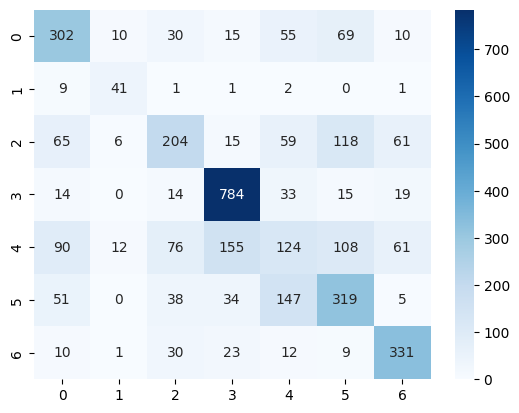

In [25]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [26]:
print( classification_report(test_data.classes, predictions) )

              precision    recall  f1-score   support

           0       0.56      0.62      0.59       491
           1       0.59      0.75      0.66        55
           2       0.52      0.39      0.44       528
           3       0.76      0.89      0.82       879
           4       0.29      0.20      0.23       626
           5       0.50      0.54      0.52       594
           6       0.68      0.80      0.73       416

    accuracy                           0.59      3589
   macro avg       0.56      0.60      0.57      3589
weighted avg       0.56      0.59      0.57      3589



# 1 Image Classification

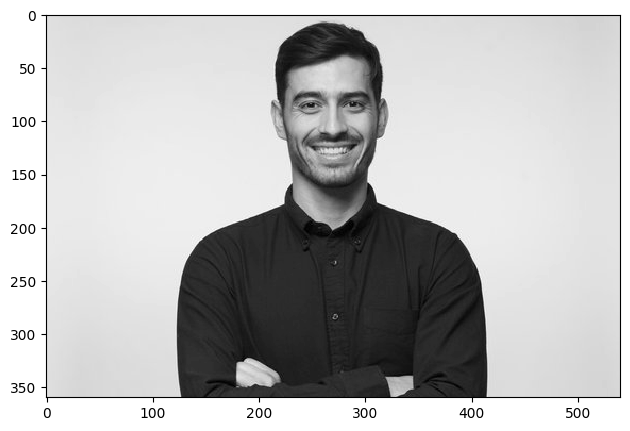

In [27]:
image = cv2.imread("person1.jpg", cv2.IMREAD_GRAYSCALE)
imshow( image)

In [28]:
image.shape

(360, 540)

In [29]:
face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [30]:
original_image = image.copy()
faces = face_detector.detectMultiScale(original_image)

In [31]:
faces

array([[208,  37, 120, 120]])

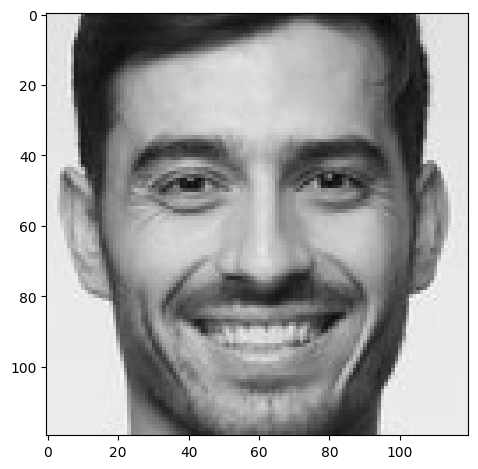

In [32]:
# region of interest
roi = image[ faces[0][1]:faces[0][1] + faces[0][3], faces[0][0]:faces[0][0] + faces[0][2] ]

imshow(roi)

In [33]:
roi.shape

(120, 120)

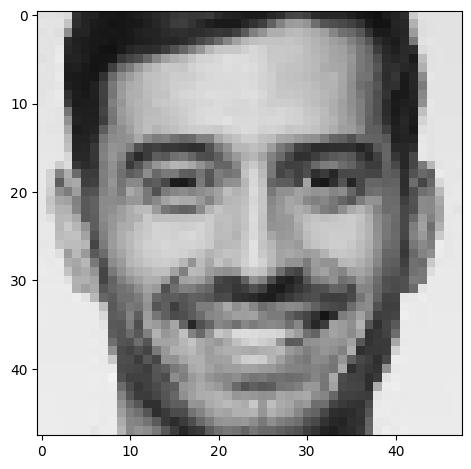

In [34]:
roi = cv2.resize(roi, (48, 48))
imshow(roi)

In [35]:
roi.shape

(48, 48)

In [36]:
roi =  roi / 255

In [37]:
roi = np.expand_dims(roi, axis=0) # converting into batch
roi.shape

(1, 48, 48)

In [38]:
probs = network_loaded.predict(roi)
probs

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


array([[3.1499444e-03, 4.5681595e-06, 1.5495744e-03, 9.5181346e-01,
        3.2022011e-02, 6.4850244e-04, 1.0811905e-02]], dtype=float32)

In [39]:
res = np.argmax(probs)
res

3

In [40]:
test_data.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

# Multi Classification

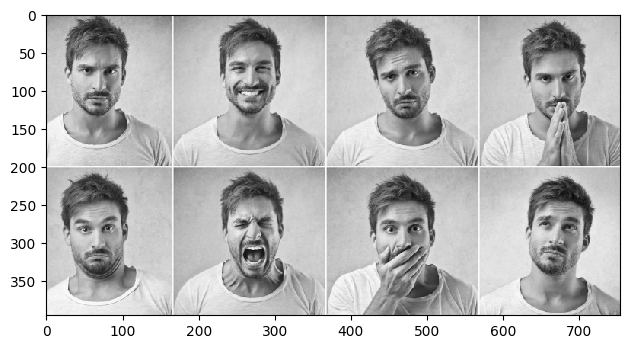

In [41]:
image = cv2.imread("faces_emotions.png", cv2.IMREAD_GRAYSCALE)
imshow( image)

In [42]:
faces = face_detector.detectMultiScale(image)
faces

array([[625,  49,  91,  91],
       [224,  35,  90,  90],
       [229, 242,  85,  85],
       [ 19, 243,  98,  98],
       [421, 242,  97,  97],
       [627, 241,  91,  91],
       [ 22,  40,  92,  92],
       [420,  43,  98,  98]])

In [43]:
test_data.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [44]:
emotions = list(test_data.class_indices.keys())
emotions

['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


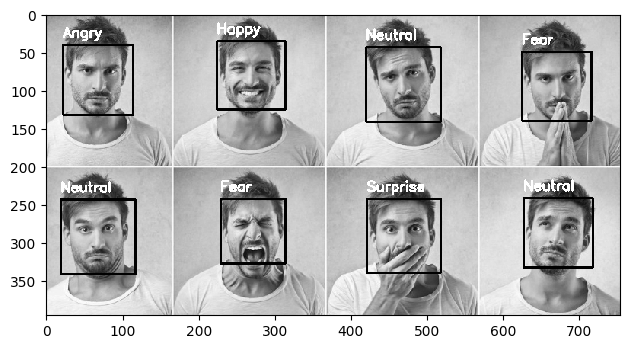

In [45]:
image_face = image.copy()

for (x, y, w, h) in faces:
    roi = image_face[y:y+h, x:x+w]
    roi = cv2.resize(roi, (48, 48))
    roi = roi / 255
    roi = np.expand_dims(roi, axis=0)
    probs = network_loaded.predict(roi)
    res = np.argmax(probs)
    cv2.rectangle(image_face, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(image_face, emotions[res], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)
imshow(image_face)

# Detection in Videos

In [46]:
cap =   cv2.VideoCapture('emotion_test01.mp4')
connected, video = cap.read()
print(connected, video.shape)

True (360, 640, 3)


In [47]:
save_path = 'emotion_test01_result.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID') # for more info on this line, go to 'fourcc.org'
fps = 24
output_video = cv2.VideoWriter(save_path, fourcc, fps, (video.shape[1], video.shape[0]))

In [49]:
while( cv2.waitKey(1) < 0 ):
    connected, frame = cap.read()
    if not connected:
        break

    faces = face_detector.detectMultiScale(frame, scaleFactor=1.2, minNeighbors=5, minSize=(30, 30))
    if len(faces) > 0:
        for (x, y, w, h) in faces:
            frame = cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
            roi = frame[y:y+h, x:x+w]
            roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
            roi = cv2.resize( roi, (48, 48) )
            roi = roi / 255
            roi = np.expand_dims(roi, axis=0)
            predictions = network_loaded.predict(roi)

            if predictions is not None:
                res = np.argmax(predictions)
                cv2.putText(frame, emotions[res], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    output_video.write(frame)
    cv2.imshow('Emotion Detection', frame)

print("End")    
output_video.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━